In [73]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly import subplots

In [15]:
kgh = pd.read_csv('kgh_d.csv',index_col=0,parse_dates=True)
kgh.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2015-01-02,102.45,102.83,101.97,102.40,309987
2015-01-05,102.16,102.88,99.91,100.09,479228
2015-01-07,100.53,105.45,99.67,104.89,966372
2015-01-08,105.35,107.15,105.35,107.11,711805
2015-01-09,107.15,107.15,103.87,104.33,563221


In [14]:
miedz = pd.read_csv('ca_c_f_d.csv',index_col=0,parse_dates=True)
miedz.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
Data,,,,
2015-01-02,6309.0,6309.0,6309.0,6309.0
2015-01-05,6216.0,6216.0,6216.0,6216.0
2015-01-06,6191.0,6191.0,6191.0,6191.0
2015-01-07,6170.0,6170.0,6170.0,6170.0
2015-01-08,6230.5,6230.5,6230.5,6230.5


In [61]:
#temp = kgh.join(miedz,on='Data',how='inner',rsuffix='_m')['Zamkniecie_m']
#temp.head()

In [82]:
table_data = pd.DataFrame({'Data':kgh.index,'KGHM':kgh['Zamkniecie'],'Miedź':kgh.join(miedz,on='Data',how='inner',rsuffix='_m')['Zamkniecie_m']})
table_data.head()

,Data,KGHM,Miedź
Data,,,
2015-01-02,2015-01-02,102.40,6309.0
2015-01-05,2015-01-05,100.09,6216.0
2015-01-07,2015-01-07,104.89,6170.0
2015-01-08,2015-01-08,107.11,6230.5
2015-01-09,2015-01-09,104.33,6151.0


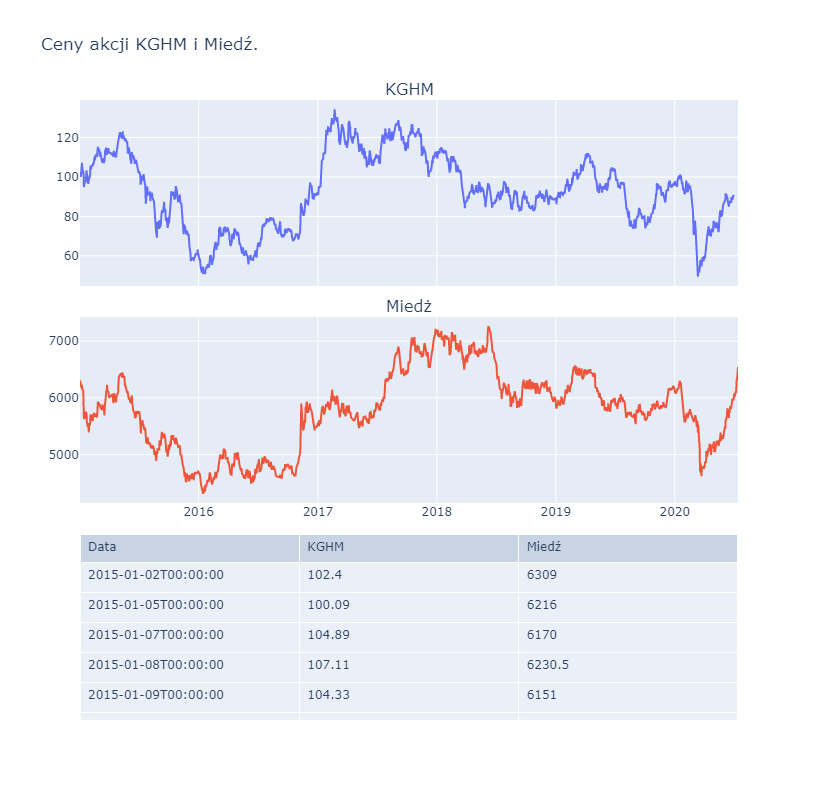

In [112]:
fig = subplots.make_subplots(rows=3,cols=1,
                             subplot_titles=['KGHM','Miedż'],
                             shared_xaxes=True,
                             vertical_spacing=0.05,
                             specs=[[{"type": "scatter"}],
                                    [{"type": "scatter"}],
                                    [{"type": "table"}]]
                            )

fig.add_trace(go.Scatter(x=kgh.index,
                         y=kgh['Zamkniecie'],
                         mode='lines',
                        showlegend=False,
                        name='KGHM',
                        text=kgh['Zamkniecie']),
              1,1)

fig.add_trace(go.Scatter(x=miedz.index,
                         y=miedz['Zamkniecie'],
                         mode='lines',
                         showlegend=False,
                        name='Miedź',
                        text=miedz['Zamkniecie']),
              2,1)

fig.add_trace(go.Table(header=dict(values=list(table_data.columns),
                                   font=dict(size=12),
                                   align="left"),
                       cells=dict(values=[table_data['Data'],table_data['KGHM'], table_data['Miedź']],
                                  align = "left",
                                  font=dict(size=12),
                                  height=30)),
              3,1)

fig.update_layout(height=800,
                  showlegend=False,
                  title_text="Ceny akcji KGHM i Miedź.")

fig.show()